# Homework 2
## Implementing Core Concepts


## I have run the function for myself which prove to be workable
## Befor you try to run the last function, please read my summary which will prevent you misunderstand my function

### Task 1
    Write a Python function that reads data from a file 
    using get_data_from_file(ticker) and returns:

- Mu (the average, relative daily Adj Close change). The spreadsheets have the formula.
- Sigma -- The standard deviation of Mu. The spreadsheets have the formula.

#### explain the two function form lecture that I used in this problem 
 

In [1]:
# import the libraries which I need to use in this program
import pandas as pd 
import random

In [2]:
# This function takes a ticker symbol and loads a data frame
# with the data stored in a CSV file in the current directory.
# argument: the name of ticker
# expect output: the data of the ticker price as a dataframe
def get_data_from_file(ticker):
    f_name = ticker + ".csv"
    df = pd.read_csv(f_name, delimiter=",")
    return df


## test of the function
get_data_from_file('AAPL').head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,170.160004,172.300003,169.259995,172.259995,172.259995,25555900
1,2018-01-03,172.529999,174.550003,171.960007,172.229996,172.229996,29517900
2,2018-01-04,172.539993,173.470001,172.080002,173.029999,173.029999,22434600
3,2018-01-05,173.440002,175.369995,173.050003,175.000000,175.000000,23660000
4,2018-01-08,174.350006,175.610001,173.929993,174.350006,174.350006,20567800


In [3]:
# this function enable us to calculate the average price
# argument: close_price (list of number)
# expected output: the the average of 

def compute_average(close_prices):
    no_of_entries = len(close_prices)
    total = 0
    for i in range(0,no_of_entries):
        total = total + close_prices[i]
        
    result = total / no_of_entries
    return result

# test of this function 
aapl_close = get_data_from_file('AAPL')['Close']
avg_aapl_price = compute_average(aapl_close)
print("The average close price for AAPL is", avg_aapl_price)

The average close price for AAPL is 173.722272091


#### my function

In [4]:
# like the compute_average function which we use to calculate the average
# I write the function compute_std which we use to calcualte the standard deviation

def compute_std(price):
# argument: price (list of number)
# expected output: the the average of 
    
    Mu = compute_average(price)
    
    ## part one: calculate the diff from mean
    diff_from_mean = []
    for i in range(len(price)):
        diff_from_mean.append((price[i] - Mu) ** 2)
        # calculate the diff from mean and append every value to the end of list
    
    ## part two: calculate sigma based on the formula
    Sigma = (sum(diff_from_mean) / (len(diff_from_mean) - 1)) ** (1/2)
    
    return Sigma

# test of the function

aapl_close = get_data_from_file('AAPL')['Close']
std_aapl_price = compute_std(aapl_close)
print("The standard deviation close price for AAPL is", std_aapl_price)    


The standard deviation close price for AAPL is 3.75987492743


In [5]:
def Mu_Sigma_Calculator(ticker):
# argument: ticker (the name of the stock)
# expected output: Mu(the average) and sigma(the standard deviation)
    
    # 1. utilize get_data_from_file function to read data 
    df = get_data_from_file(ticker)
    
    # 2. extract the infromation about Adj Close 
    Adj_Close = df['Adj Close']
    
    # 3. calculate the Mu (mu should be calculate first since sigma need to calculate based on mu)
    ## part one: calculate the Relative Change
    Relative_Change = []
    # create a empty list to store relative change records
    
    for i in range(len(Adj_Close) - 1): 
        # here i iterate from the 0 to the (n-1) element in the adj close, where n is the number of element in adj close
        Relative_Change.append((Adj_Close[i + 1] - Adj_Close[i]) / Adj_Close[i])
        # calculate relative change for different time and append it to the end of list relative change
    
    # calculate mu based on the compute_average function   
    Mu = compute_average(Relative_Change)
    
    ## 4 calculate Sigma, based on the compute_srd function
    Sigma = compute_std(Relative_Change)
    
    return Mu,Sigma
   
        
## test of the function
test_1 = Mu_Sigma_Calculator('AAPL')

print("For AAPL,the Mu is:", test_1[0], ";The sigma is:",test_1[1])
# the result is same as example

For AAPL,the Mu is: -0.00121312001591 ;The sigma is: 0.00925301737573


### Task 2
Write a function of the form: random_daily_return(s, mu, sigma).

The function computes the new daily stock price. This is the previous price S plus a random element. The formula for the random element is

  $$delta = (s \times mu) + (s \times sigma \times R)$$

You can import the package numpy as np. Use np.random(0,1) to compute R. Compute R inside the function. (You can use numpy random normal if you want).

The new stock price you return is the input parameter s plus delta.
#### my function

In [6]:
# Here I write a function which realize three targes:
# 1. simulate a random variable R
# 2. calulate the delta
# 3. calulate new stock price

def random_daily_return(s,mu,sigma):
# arguments: s(the old price); mu(the past average of the prive) and sigma(the std of past price)
# expected output: the new price

    # 1. simulate R
    
    R = np.random.normal(0,1)
    
    # 2. calulate the delta
    
    delta = (s * mu) + (s*sigma*R)
    
    # 3. calculate new stock
    new_price = s + delta
    return(new_price)


### Task 3
Create a function to produce the ramdom walk simulating a trading year. Call this random_stock_year.

- There are 252 trading days in a year.
- Build an return a list with 252 elements. Each element is the return value of a new call to random_daily_return. That is, you will call random_daily_return 252 times.
- Return the list.
#### my function

In [7]:
# Here I write a function which realize the simulation of the stock price in one year

## Thus, there are mainly three sub targets:
## 1. simulate the first price 
## 2. use simulated first price to update the price(s)


def random_stock_year(s,mu,sigma):
# arguments: s(the old price); mu(the past average of the prive) and sigma(the std of past price)
# expected output: the new price of the next year    
    
        
        ## 1. simulate the first price(s)
        random_stock = []
        # create a empty list which I will use to store the price
        
        # for the first price I use the starting price which I provide in argument
        # I will delect this latter since this is not a simulated data
        random_stock.append(s)
        
        ## 2. use simulated first price to update the price(s)
        for i in range(251):
            s = random_stock[-1]
            random_stock.append(random_daily_return(s,mu,sigma))
            
        # delect the first data
        result = random_stock[1:]
                                
        return random_stock
            

### Task 4
1. imports
    1. numpy as np
    2. import math (to get sqrt)
    3. import matplotlib.pyplot as plt
2. Parse command line arguments to input a ticker symbol and the number of simulation to execute. There is an example in the Mony Hall simulation that we covered in lectures. You will have to make minor modifications.
3. Validate the input and print an error message if it is invalid. The rules are:
    1. The ticker symbol is in the list ['AAPL', 'GOOG', 'AMZN']. 
    2. The number of simulations must be greater than 0.
4. Loop for the number of requested simulations. The loop should call
    1. l = random_stock_year
    2. plt.plot(l)
5. After the loop completes, call plt.show().

In [8]:
# import the libraries
import numpy as np
import math  # acutally do not need fot this
import matplotlib.pyplot as plt

In [38]:
# first I wirte a function named input_information which I can ask the user to input the information
def input_information():
# argument: none
# expected output: ticket name, and the number of year that we want to simulated
    
    
    ticket = input("please input the name of your stock(ticket):").upper().split(",")
    # split by "," enable us to split the information based on the symbol " ,"
    # in this way we can input many different companies, no matter whether the input is lower case or upper case
    
    number_of_year = input("please input the number of year:")
    
    # the folloing code is used to test whether the information input is vaild
    information_valid = True
   
    
    for i in ticket:
        if i not in ['AAPL', 'GOOG', 'AMZN']:
            print("the stock use in the list!")
            information_valid = False
            
    if int(number_of_year) <= 0 :
        print("the number of year that you want to simulate must bigger than 0")
        information_valid = False
    
    
    return ticket,number_of_year,information_valid


def simulation_of_stock():
        # first we need to get all the information
        
        ticket,number_of_year,information_valid = input_information()
        
        # if the input information is not valid then we just print try again.And do nothing
        if information_valid == False:
            print("please try again!")
        
        
        else:
            # use try we can test other error(possible)
            try:
                for i in ticket:
                    for j in range(int(number_of_year)):
                        this_ticket = i
                        Mu = Mu_Sigma_Calculator(this_ticket)[0]
                        Sigma = Mu_Sigma_Calculator(this_ticket)[1]
                        s = list(get_data_from_file(this_ticket)['Adj Close'])[-1]
                        I = random_stock_year(s,Mu,Sigma)
                        plt.plot(I)
        
                plt.title("the price of stock in the future one year")
                plt.xlabel("times")
                plt.ylabel("price of the stock")
                plt.show()
            
            except:
                print("Got value error = ",ValueError,"please try again!")
            finally:
                print("work done")

        # this will tell us that the work is finished.        

### result test

** Summary of my function（please read this befor run the function!）**

- What this function CAN do:
 
 1. simulate the price of stock for any stock in the list and any positive numbe of year;
 2. prevent user input the negative number of year and the stock name not in the list.
   *The function will give hint rather than an error message!*
 3. if the stock name you input is not in upper class, I will change it to upper case for you
 
 **However this function is not perfect**
 
- What this function CANNOT do:
 
 1. prevent user input unvaild number of year (*this must be a number, otherwise an error message will show*)
 2. Automatically update the value of mu and sigma (The prediction in the long run would be unrealiable)
 3. *the stock name you input shoud be splited by space rather any other things and please input all the stock name at the same time!*
 4. the plot cannot tell which line belong to which company's stock which may make user feel confused.
 
 **Sorry for thsee! I will keep tring to make this more user-friendly**

In [39]:
# if we try to input wrong inforamtion(unvaild stock name)
simulation_of_stock()

please input the name of your stock(ticket):-12
please input the number of year:31
the stock use in the list!
please try again!


In [40]:
# if we try to input wrong inforamtion(unvaild number of year)
simulation_of_stock()

please input the name of your stock(ticket):appl
please input the number of year:-120
the stock use in the list!
the number of year that you want to simulate must bigger than 0
please try again!


please input the name of your stock(ticket):aapl,goog,amzn
please input the number of year:20


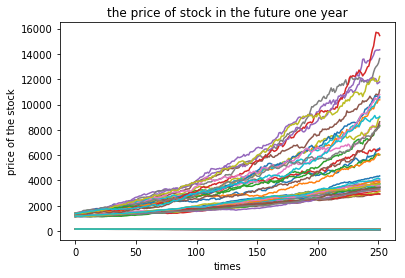

work done!


In [73]:
# if we try to input the right input
simulation_of_stock()

** thank you for your grading!**